In [1]:
import pandas as pd

In [2]:
# Load the Excel file
file_path = 'Test_01.xlsx'  # Update with your file path
df = pd.read_excel(file_path)

In [3]:
# Display the column names
print("Column Names:")
print(df.columns)

Column Names:
Index(['Source',     1990,     1991,     1992,     1993,     1994,     1995,
           1996,     1997,     1998,     1999,     2000,     2001,     2002,
           2003,     2004,     2005,     2006,     2007,     2008,     2009,
           2010,     2011,     2012,     2013,     2014,     2015,     2016,
           2017,     2018,     2019,     2020,     2021,     2022],
      dtype='object')


In [4]:
# Check for missing data
print("\nMissing Data Information:")
print(df.isnull().sum())


Missing Data Information:
Source    0
1990      0
1991      0
1992      0
1993      0
1994      0
1995      0
1996      0
1997      0
1998      0
1999      0
2000      0
2001      0
2002      0
2003      0
2004      0
2005      0
2006      0
2007      0
2008      0
2009      0
2010      0
2011      0
2012      0
2013      0
2014      0
2015      0
2016      0
2017      0
2018      0
2019      0
2020      0
2021      0
2022      0
dtype: int64


# Version 01

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
file_path = 'Test_01.xlsx'  # Path to your Excel file
df = pd.read_excel(file_path)

In [8]:
years = df.columns[1:]  # Assuming first column is 'Source' and rest are years
sources = df['Source']

# Calculate year-over-year percentage change in emissions
yearly_change = df[years].pct_change(axis=1)

In [9]:
num_simulations = 1000
future_years = np.arange(2023, 2031)  # Future years you want to simulate

In [10]:
# Store results in a DataFrame
simulation_results = pd.DataFrame()

In [11]:

for source in sources:
    historical_emissions = df.loc[df['Source'] == source, years].values.flatten()
    
    # Calculate year-over-year changes
    historical_changes = yearly_change.loc[df['Source'] == source].dropna(axis=1).values.flatten()
    
    # Fit normal distribution to historical changes (mean, std)
    mean_change = np.mean(historical_changes)
    std_change = np.std(historical_changes)
    
    # Simulate emissions for future years
    last_known_value = historical_emissions[-1]
    simulated_emissions = [last_known_value]
    
    for _ in future_years:
        random_change = np.random.normal(mean_change, std_change)
        new_value = simulated_emissions[-1] * (1 + random_change)
        simulated_emissions.append(new_value)
    
    # Combine historical and simulated emissions
    total_emissions = np.concatenate([historical_emissions, simulated_emissions[1:]])
    
    # Store the simulation results for each source
    simulation_results[source] = total_emissions

In [12]:
all_years = np.concatenate([years, future_years])

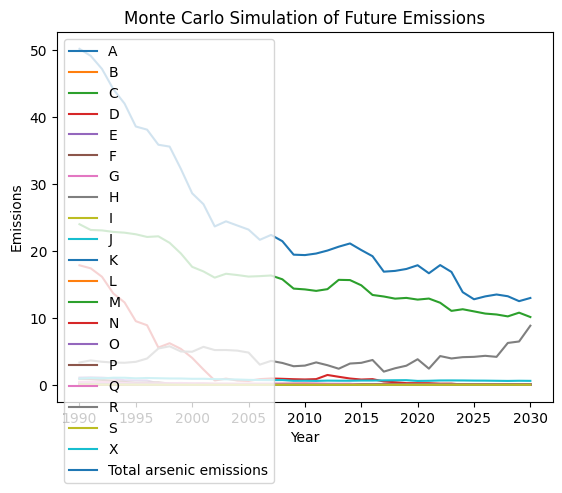

In [13]:
for source in sources:
    plt.plot(all_years, simulation_results[source], label=source)

plt.xlabel("Year")
plt.ylabel("Emissions")
plt.legend(loc="upper left")
plt.title("Monte Carlo Simulation of Future Emissions")
plt.show()

In [14]:
# Prepare final dataframe for export
all_years = np.concatenate([years, future_years])  # Combine historical and future years
simulation_results.index = all_years

# Save the predictions to an Excel file
output_file_path = 'predictions_v1.xlsx'  # Specify the output file path
simulation_results.to_excel(output_file_path)

print(f"Monte Carlo simulation results saved to {output_file_path}")

Monte Carlo simulation results saved to predictions_v1.xlsx


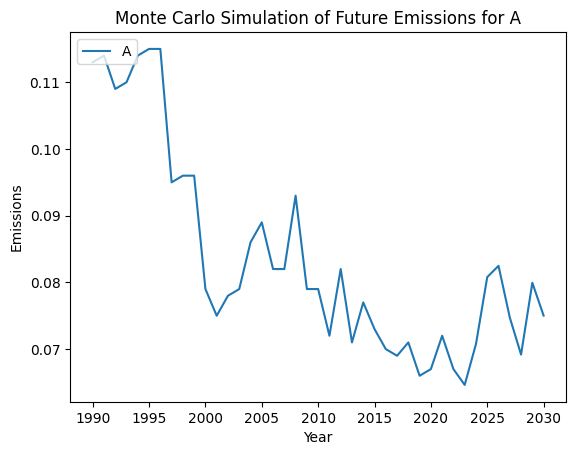

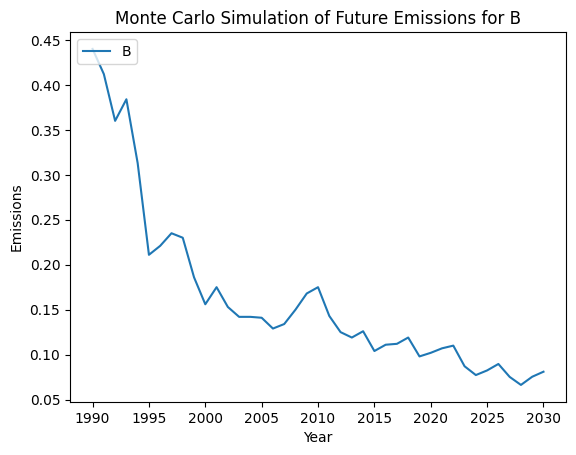

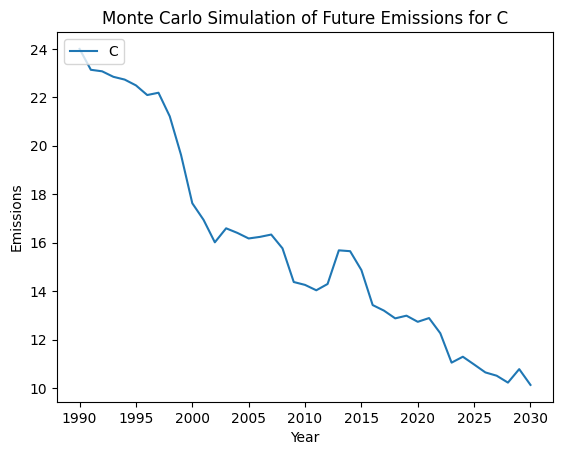

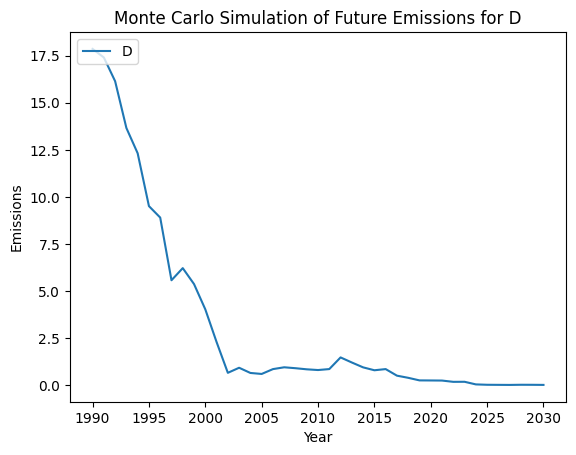

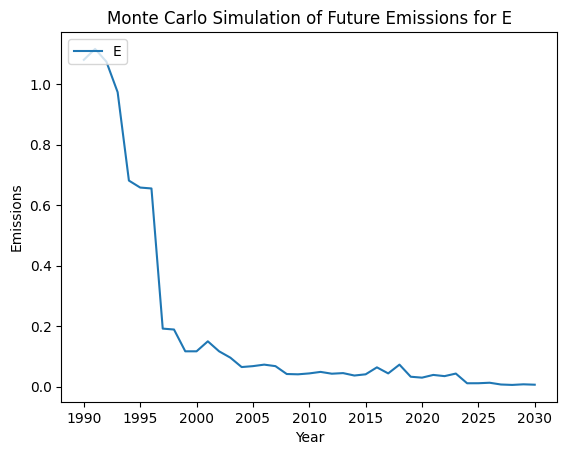

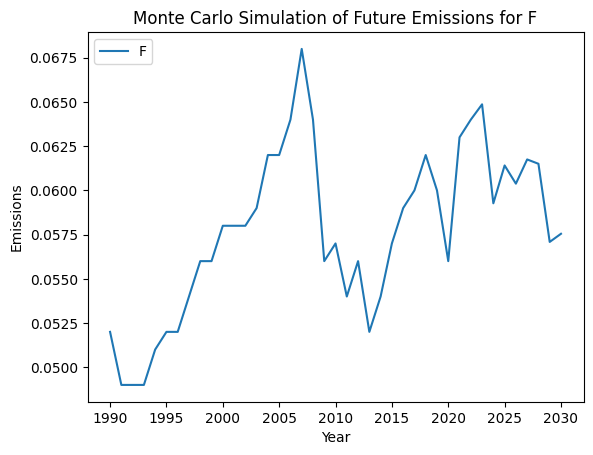

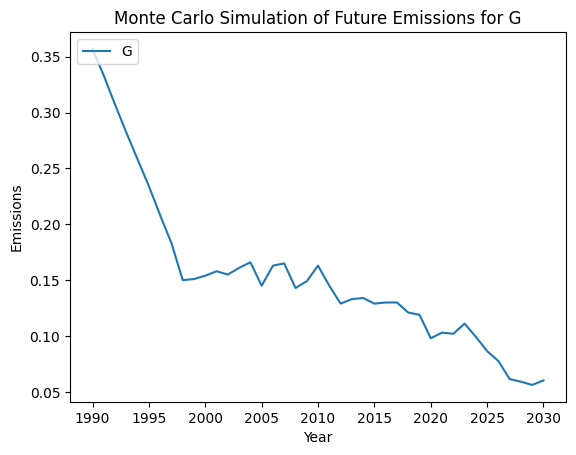

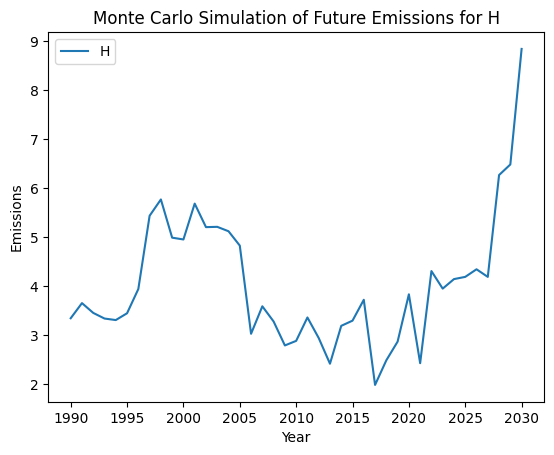

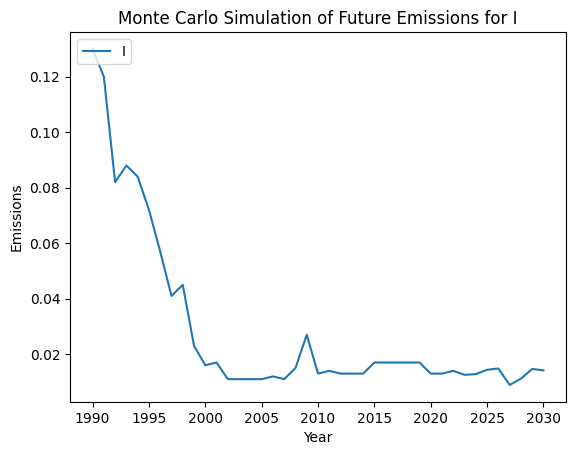

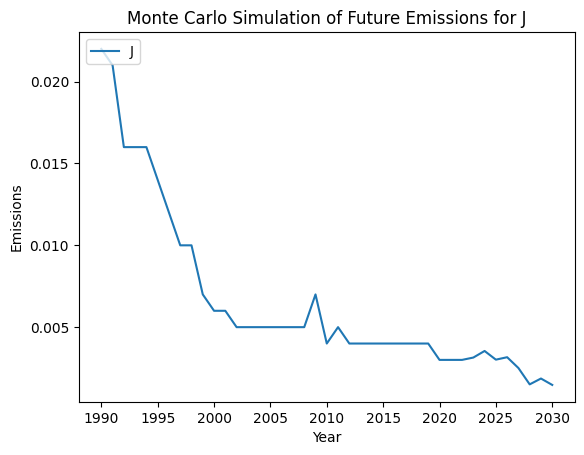

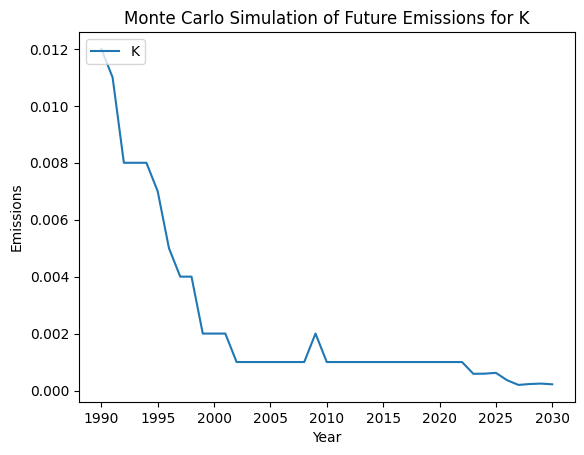

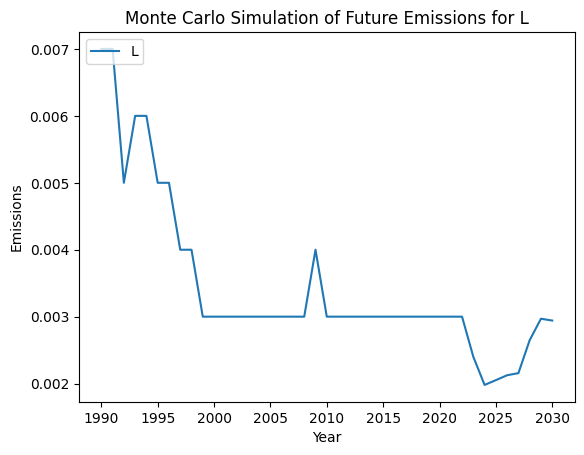

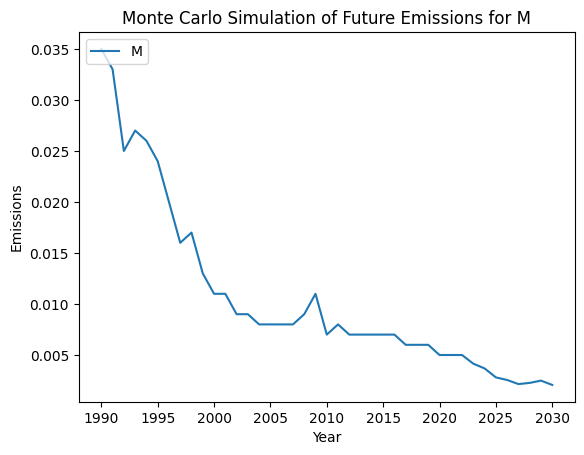

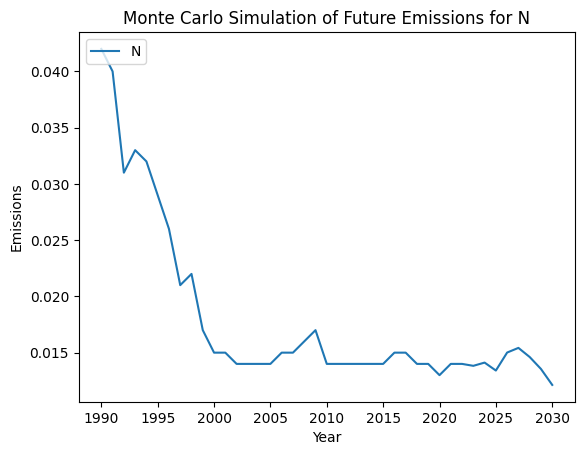

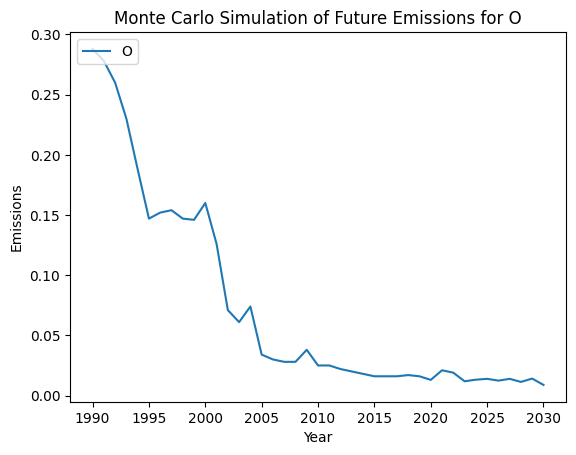

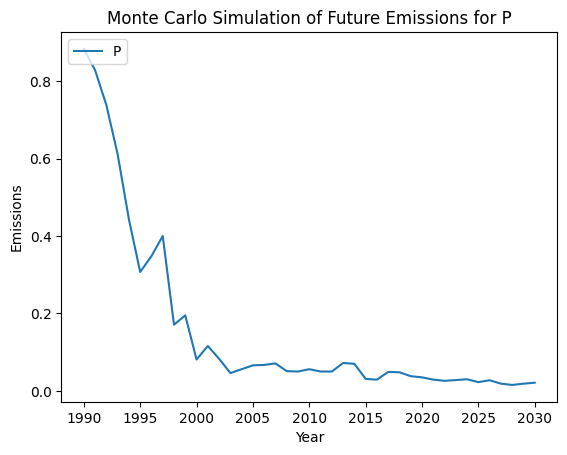

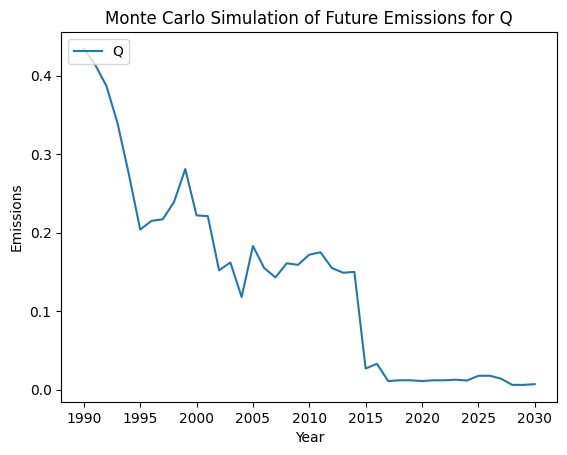

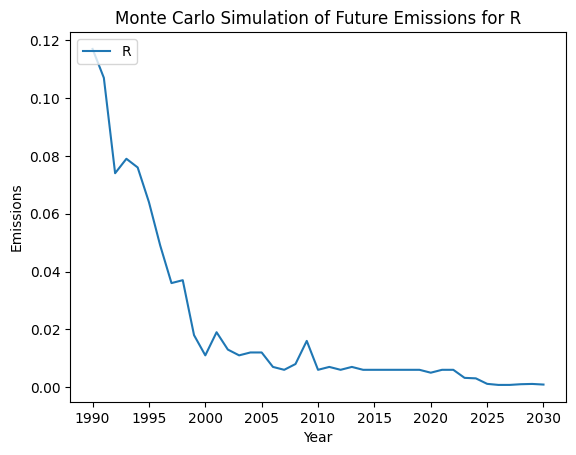

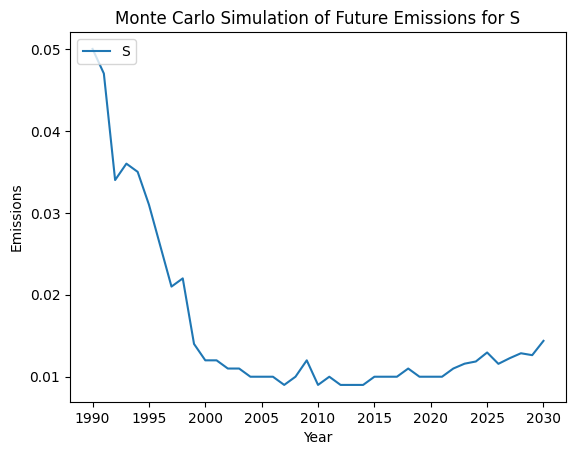

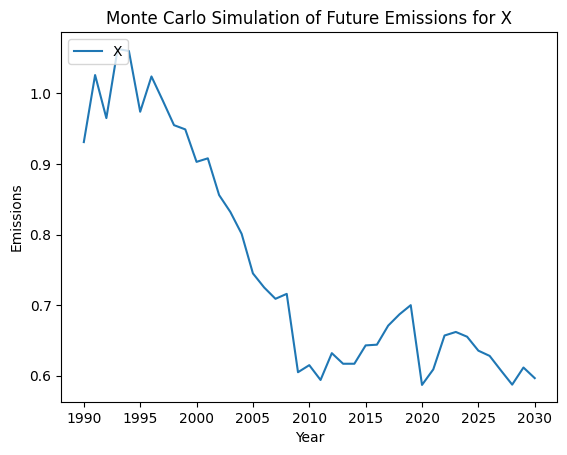

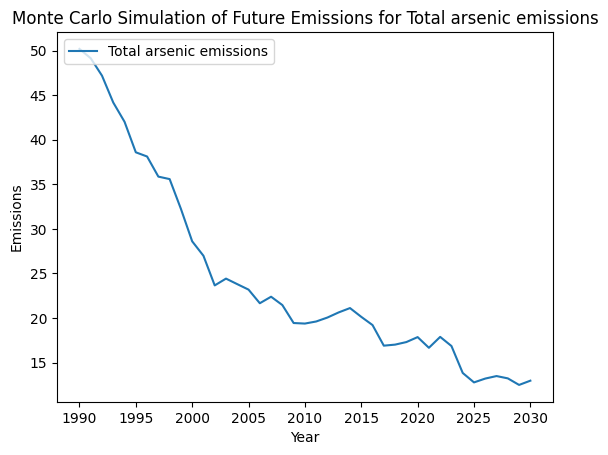

In [15]:
# Generate separate plots for each source
for source in sources:
    plt.figure()  # Create a new figure for each source
    plt.plot(all_years, simulation_results[source], label=source)
    plt.xlabel("Year")
    plt.ylabel("Emissions")
    plt.title(f"Monte Carlo Simulation of Future Emissions for {source}")
    plt.legend(loc="upper left")
    plt.show()  # Display the plot for each source individually

# Version 02

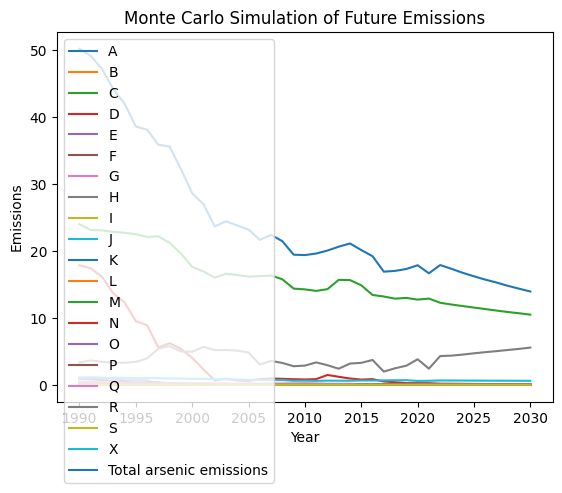

Monte Carlo simulation results saved to predictions_v2.xlsx


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'Test_01.xlsx'  # Path to your Excel file
df = pd.read_excel(file_path)

years = df.columns[1:]  # Assuming first column is 'Source' and rest are years
sources = df['Source']

# Calculate year-over-year percentage change in emissions
yearly_change = df[years].pct_change(axis=1)

num_simulations = 1000
future_years = np.arange(2023, 2031)  # Future years you want to simulate

# Store results in a DataFrame
simulation_results = pd.DataFrame()

for source in sources:
    historical_emissions = df.loc[df['Source'] == source, years].values.flatten()
    
    # Calculate year-over-year changes
    historical_changes = yearly_change.loc[df['Source'] == source].dropna(axis=1).values.flatten()
    
    # Fit normal distribution to historical changes (mean, std)
    mean_change = np.mean(historical_changes)
    std_change = np.std(historical_changes)
    
    # Run multiple simulations to capture variability
    all_simulations = np.zeros((num_simulations, len(years) + len(future_years)))
    
    for sim in range(num_simulations):
        simulated_emissions = [historical_emissions[-1]]
        
        for _ in future_years:
            random_change = np.random.normal(mean_change, std_change)
            new_value = simulated_emissions[-1] * (1 + random_change)
            simulated_emissions.append(new_value)
        
        # Combine historical and simulated emissions
        total_emissions = np.concatenate([historical_emissions, simulated_emissions[1:]])
        all_simulations[sim, :] = total_emissions
    
    # Store the average of all simulations for each source
    mean_emissions = np.mean(all_simulations, axis=0)
    simulation_results[source] = mean_emissions

all_years = np.concatenate([years, future_years])

for source in sources:
    plt.plot(all_years, simulation_results[source], label=source)

plt.xlabel("Year")
plt.ylabel("Emissions")
plt.legend(loc="upper left")
plt.title("Monte Carlo Simulation of Future Emissions")
plt.show()

# Prepare final dataframe for export
simulation_results.index = all_years

# Save the predictions to an Excel file
output_file_path = 'predictions_v2.xlsx'  # Specify the output file path
simulation_results.to_excel(output_file_path)

print(f"Monte Carlo simulation results saved to {output_file_path}")

# Version 03

Source with the highest total contribution to future emissions: Total arsenic emissions (125.08)
Source with the largest increase in future contributions: H (29.13%)


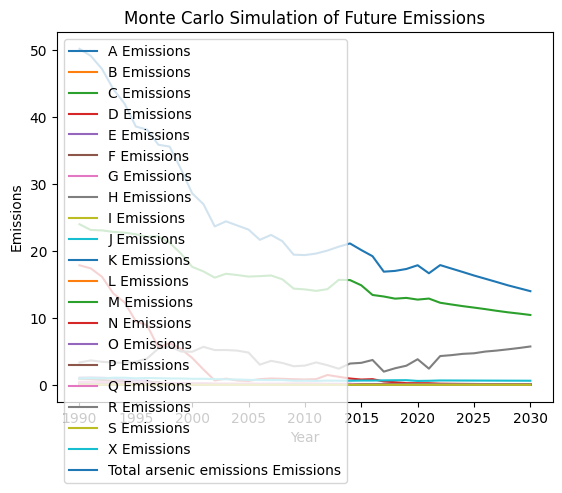

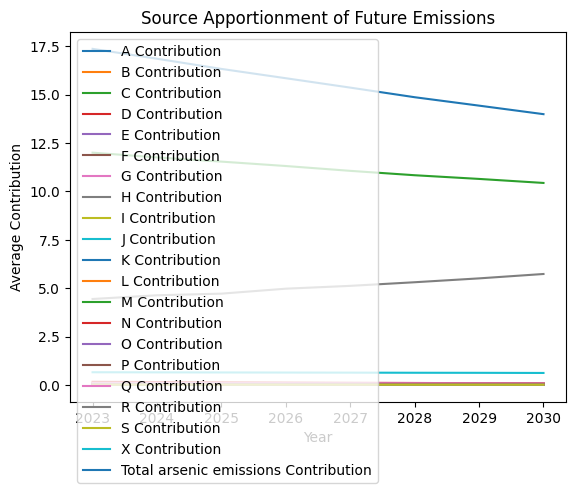

Monte Carlo simulation results saved to predictions_v3.xlsx
Source apportionment results saved to source_apportionment_v1.xlsx


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'Test_01.xlsx'  # Path to your Excel file
df = pd.read_excel(file_path)

years = df.columns[1:]  # Assuming first column is 'Source' and rest are years
sources = df['Source']

# Calculate year-over-year percentage change in emissions
yearly_change = df[years].pct_change(axis=1)

num_simulations = 1000
future_years = np.arange(2023, 2031)  # Future years you want to simulate

# Store results in DataFrames
simulation_results = pd.DataFrame()
source_contributions = pd.DataFrame(index=future_years, columns=sources)

for source in sources:
    historical_emissions = df.loc[df['Source'] == source, years].values.flatten()
    
    # Calculate year-over-year changes
    historical_changes = yearly_change.loc[df['Source'] == source].dropna(axis=1).values.flatten()
    
    # Fit normal distribution to historical changes (mean, std)
    mean_change = np.mean(historical_changes)
    std_change = np.std(historical_changes)
    
    # Run multiple simulations to capture variability
    all_simulations = np.zeros((num_simulations, len(years) + len(future_years)))
    source_simulations = np.zeros((num_simulations, len(future_years)))
    
    for sim in range(num_simulations):
        simulated_emissions = [historical_emissions[-1]]
        
        for _ in future_years:
            random_change = np.random.normal(mean_change, std_change)
            new_value = simulated_emissions[-1] * (1 + random_change)
            simulated_emissions.append(new_value)
        
        # Combine historical and simulated emissions
        total_emissions = np.concatenate([historical_emissions, simulated_emissions[1:]])
        all_simulations[sim, :] = total_emissions
        
        # Store simulated future emissions for apportionment
        source_simulations[sim, :] = simulated_emissions[-len(future_years):]
    
    # Store the average of all simulations for each source
    mean_emissions = np.mean(all_simulations, axis=0)
    simulation_results[source] = mean_emissions
    
    # Calculate average contributions for each future year
    average_contributions = np.mean(source_simulations, axis=0)
    source_contributions[source] = average_contributions

all_years = np.concatenate([years, future_years])

# Calculate the total contribution for each source over future years
total_future_contribution = source_contributions.sum(axis=0)

# Calculate the percentage change in contributions from the first to the last future year
percentage_change = ((source_contributions.loc[future_years[-1]] - source_contributions.loc[future_years[0]]) / source_contributions.loc[future_years[0]]) * 100

# Identify the source with the highest total contribution and the largest increase
max_contribution_source = total_future_contribution.idxmax()
max_contribution_value = total_future_contribution.max()
largest_increase_source = percentage_change.idxmax()
largest_increase_value = percentage_change.max()

# Output results
print(f"Source with the highest total contribution to future emissions: {max_contribution_source} ({max_contribution_value:.2f})")
print(f"Source with the largest increase in future contributions: {largest_increase_source} ({largest_increase_value:.2f}%)")

# Plot total emissions with source apportionment
for source in sources:
    plt.plot(all_years, simulation_results[source], label=f'{source} Emissions')

plt.xlabel("Year")
plt.ylabel("Emissions")
plt.legend(loc="upper left")
plt.title("Monte Carlo Simulation of Future Emissions")
plt.show()

# Plot source contributions over future years
for source in sources:
    plt.plot(future_years, source_contributions[source], label=f'{source} Contribution')

plt.xlabel("Year")
plt.ylabel("Average Contribution")
plt.legend(loc="upper left")
plt.title("Source Apportionment of Future Emissions")
plt.show()

# Prepare final dataframes for export
simulation_results.index = all_years
source_contributions.index = future_years

# Save the predictions and source apportionment to Excel files
output_file_path = 'predictions_v3.xlsx'
simulation_results.to_excel(output_file_path)

source_contributions_file_path = 'source_apportionment_v1.xlsx'
source_contributions.to_excel(source_contributions_file_path)

print(f"Monte Carlo simulation results saved to {output_file_path}")
print(f"Source apportionment results saved to {source_contributions_file_path}")


In [19]:
# Output results
print(f"Source with the highest total contribution to future emissions: {max_contribution_source} ({max_contribution_value:.2f})")
print(f"Source with the largest increase in future contributions: {largest_increase_source} ({largest_increase_value:.2f}%)")

# Plot total emissions with source apportionment
for source in sources:
    plt.figure(figsize=(10, 6))
    plt.plot(all_years, simulation_results[source], label=f'{source} Emissions')
    plt.xlabel("Year")
    plt.ylabel("Emissions")
    plt.legend(loc="upper left")
    plt.title(f"Monte Carlo Simulation of Total Emissions for {source}")
    plt.grid(True)
    plt.savefig(f'{source}_total_emissions.png')
    plt.close()

# Plot individual source contributions over future years
for source in sources:
    plt.figure(figsize=(10, 6))
    plt.plot(future_years, source_contributions[source], marker='o', linestyle='-', label=f'{source} Contribution')
    plt.xlabel("Year")
    plt.ylabel("Average Contribution")
    plt.legend(loc="upper left")
    plt.title(f"Source Contribution Over Future Years for {source}")
    plt.grid(True)
    plt.savefig(f'{source}_contribution.png')
    plt.close()

Source with the highest total contribution to future emissions: Total arsenic emissions (125.08)
Source with the largest increase in future contributions: H (29.13%)


In [16]:
import pandas as pd

# Creating a sample DataFrame
data = pd.DataFrame({
    'Name': ['Geek1', 'Geek2', 'Geek3', 'Geek4', 'Geek5'],
    'Age': [25, 30, 22, 35, 28],
    'Salary': [50000, 60000, 45000, 70000, 55000]
})

# Setting 'Name' column as the index for clarity
data.set_index('Name', inplace=True)

# Displaying the original DataFrame
print("Original DataFrame:")
print(data)

# Extracting a single row by index
row_alice = data.iloc[3:]
print("\nExtracted Row (Geek1):")
print(row_alice)

# # Extracting multiple rows using a slice
# rows_geek2_to_geek3 = data.iloc[1:3, :]
# print("\nExtracted Rows (Geek2 to Geek3):")
# print(rows_geek2_to_geek3)



Original DataFrame:
       Age  Salary
Name              
Geek1   25   50000
Geek2   30   60000
Geek3   22   45000
Geek4   35   70000
Geek5   28   55000

Extracted Row (Geek1):
       Age  Salary
Name              
Geek4   35   70000
Geek5   28   55000


In [18]:
x = 8
y = 'a'

con = int(y)
ad = x+con
print(ad)

ValueError: invalid literal for int() with base 10: 'a'